In [91]:
import os
import pandas as pd
import seaborn as sns
import similarity_index as similarity_index
from scipy import stats
import statsmodels as sms

In [2]:
OUT_DIR = "outputs"
XL_PATH = r"inputs/radiomicsFeatures.csv"

In [3]:
num_repeats = 100

feats_df = pd.read_csv(XL_PATH)

In [4]:
stability_df = {"fs_method":[], "similarity_measure":[], "top_k":[], "estimate":[]}

fs_methods = ["random", "oneDSAE", "bayesianDSAE", "ensembleDSAE", "backwardSFS/LogisticRegression", "backwardSFS/SVC", "backwardSFS/RandomForestClassifier", "backwardSFS/MLPClassifier"]
similarity_methods = {"jaccard":similarity_index.jaccard, "dice":similarity_index.dice, "kuncheva":similarity_index.kuncheva, "mwm":similarity_index.mwm}
top_ks = [5, 10, 15, 20, 25]


for fs_method in fs_methods:

    for i in range(num_repeats):
    
        for j in range(i+1, num_repeats):
    
            df1 = pd.read_csv(os.path.join(OUT_DIR, fs_method, f"rank_df{i}.csv"))
            df2 = pd.read_csv(os.path.join(OUT_DIR, fs_method, f"rank_df{j}.csv"))

            for similarity_measure, similarity_fn in similarity_methods.items():

                for k in top_ks:

                    estimate = similarity_fn(df1=df1, df2=df2, k=k, feats_df = feats_df)

                    stability_df["fs_method"].append(fs_method)
                    stability_df["similarity_measure"].append(similarity_measure)
                    stability_df["top_k"].append(k)
                    stability_df["estimate"].append(estimate)

                
            estimate = similarity_index.global_spearman(df1, df2)

            stability_df["fs_method"].append(fs_method)
            stability_df["similarity_measure"].append("global_spearman")
            stability_df["top_k"].append("NA")
            stability_df["estimate"].append(estimate)

In [5]:
stability_df = pd.DataFrame(stability_df)

In [7]:
mean_stability_df = stability_df.groupby(by=["fs_method", "similarity_measure", "top_k"]).mean()

In [8]:
mean_stability_df

estimate
fs_method                      similarity_measure top_k          
backwardSFS/LogisticRegression dice               5      0.169293
                                                  10     0.230687
                                                  15     0.289549
                                                  20     0.343545
                                                  25     0.389495
...                                                           ...
random                         mwm                5      0.351689
                                                  10     0.452002
                                                  15     0.519344
                                                  20     0.572751
                                                  25     0.614868

[168 rows x 1 columns]

In [30]:
mean_stability_df.loc['ensembleDSAE']

estimate
similarity_measure top_k          
dice               5      0.437212
                   10     0.575576
                   15     0.658007
                   20     0.683596
                   25     0.698861
global_spearman    NA     0.728306
jaccard            5      0.301112
                   10     0.419038
                   15     0.502142
                   20     0.528580
                   25     0.543005
kuncheva           5      0.403713
                   10     0.521851
                   15     0.588684
                   20     0.591885
                   25     0.581228
mwm                5      0.623447
                   10     0.713441
                   15     0.765639
                   20     0.780970
                   25     0.794210

In [ ]:
stability_df.to_csv(os.path.join(OUT_DIR, "stability_df.csv"), index=False)

### Statistical Analysis (Wilcoxon Signed Rank Test)

##### <> 1. SFS+LR v/s Ensemble AE
- global, and Kuncheva Top-5

In [149]:
similarity_measure="global_spearman"
top_k = "NA"

Wilcoxon Signed Rank Test: p-value =  0.0
Paired T-Test:  normality, x- 0.04472377896308899 ,y- 0.7340412735939026 ttest- 0.0


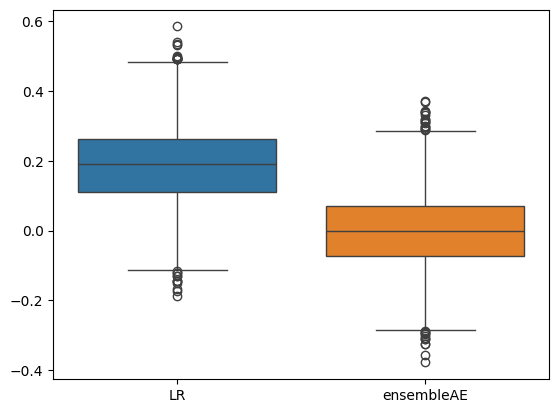

In [150]:
x = stability_df[(stability_df.fs_method=="backwardSFS/LogisticRegression")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()
y = stability_df[(stability_df.fs_method=="random")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()

sns_data = pd.DataFrame({"LR":x, "ensembleAE":y})
sns.boxplot(data=sns_data)

print("Wilcoxon Signed Rank Test: p-value = ", stats.wilcoxon(x, y).pvalue)

print("Paired T-Test: ", "normality, x-", stats.shapiro(x).pvalue, ",y-", stats.shapiro(y).pvalue, "ttest-", stats.ttest_rel(x, y).pvalue)

In [151]:
similarity_measure="kuncheva"
top_k = 5

Wilcoxon Signed Rank Test: p-value =  0.0
Paired T-Test:  normality, x- 0.0 ,y- 0.0 ttest- 0.0


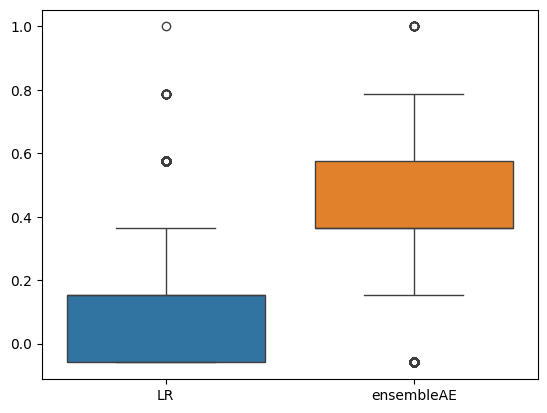

In [152]:
x = stability_df[(stability_df.fs_method=="backwardSFS/LogisticRegression")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()
y = stability_df[(stability_df.fs_method=="ensembleDSAE")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()

sns_data = pd.DataFrame({"LR":x, "ensembleAE":y})
sns.boxplot(data=sns_data)

print("Wilcoxon Signed Rank Test: p-value = ", stats.wilcoxon(x, y).pvalue)

print("Paired T-Test: ", "normality, x-", stats.shapiro(x).pvalue, ",y-", stats.shapiro(y).pvalue, "ttest-", stats.ttest_rel(x, y).pvalue)

##### <> 1. bayesian AE v/s Ensemble AE
- global, and Kuncheva Top-5

In [153]:
similarity_measure="global_spearman"
top_k = "NA"

Wilcoxon Signed Rank Test: p-value =  0.0
Paired T-Test:  normality, x- 2.2170576073819422e-28 ,y- 3.268411657955317e-23 ttest- 0.0


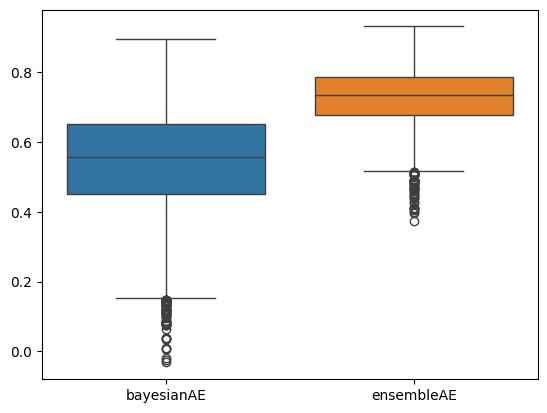

In [154]:
x = stability_df[(stability_df.fs_method=="bayesianDSAE")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()
y = stability_df[(stability_df.fs_method=="ensembleDSAE")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()

sns_data = pd.DataFrame({"bayesianAE":x, "ensembleAE":y})
sns.boxplot(data=sns_data)

print("Wilcoxon Signed Rank Test: p-value = ", stats.wilcoxon(x, y).pvalue)

print("Paired T-Test: ", "normality, x-", stats.shapiro(x).pvalue, ",y-", stats.shapiro(y).pvalue, "ttest-", stats.ttest_rel(x, y).pvalue)

In [155]:
similarity_measure="kuncheva"
top_k = 5

Wilcoxon Signed Rank Test: p-value =  1.6346274441870439e-63
Paired T-Test:  normality, x- 0.0 ,y- 0.0 ttest- 8.658129234766985e-69


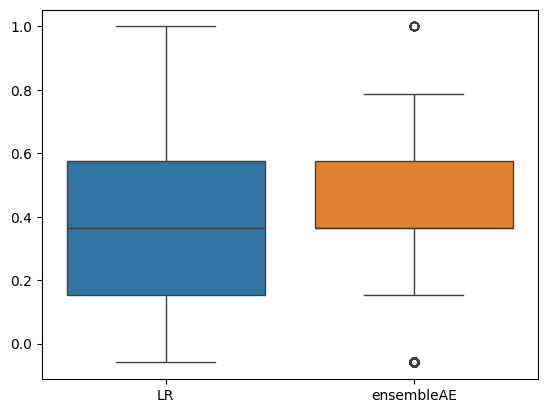

In [156]:
x = stability_df[(stability_df.fs_method=="bayesianDSAE")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()
y = stability_df[(stability_df.fs_method=="ensembleDSAE")&(stability_df.similarity_measure==similarity_measure)&(stability_df.top_k==top_k)].estimate.to_list()

sns_data = pd.DataFrame({"LR":x, "ensembleAE":y})
sns.boxplot(data=sns_data)

print("Wilcoxon Signed Rank Test: p-value = ", stats.wilcoxon(x, y).pvalue)

print("Paired T-Test: ", "normality, x-", stats.shapiro(x).pvalue, ",y-", stats.shapiro(y).pvalue, "ttest-", stats.ttest_rel(x, y).pvalue)

### Complexity Analysis

In [161]:
DATA_DIR = r"outputs"
FS_METHODS = ["backwardSFS", "oneDSAE", "bayesianDSAE", "ensembleDSAE"]

In [274]:
sfs_results_df = pd.read_csv(os.path.join(DATA_DIR, "backwardSFS/results_df.csv"), index_col=0)
sAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "oneDSAE", "results_df.csv"))
bAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "bayesianDSAE", "results_df.csv"))
eAE_results_df = pd.read_csv(os.path.join(DATA_DIR, "ensembleDSAE", "results_df.csv"))

In [313]:
time_df = {"fs_method":[], "# runs":[], "exe_time":[]}

In [314]:
sAE_time_df = pd.DataFrame({"# runs":sAE_results_df.groupby(["outer_seed"]).first().index.to_numpy(), "exe_time":sAE_results_df.groupby(["outer_seed"]).first()["exe_time"].to_numpy()})
time_df["fs_method"] += ['singleAE'] * len(sAE_time_df)
time_df["# runs"] += list(sAE_time_df["# runs"].to_numpy() + 1)
time_df["exe_time"] += list(sAE_time_df["exe_time"].to_numpy())

bAE_time_df = pd.DataFrame({"# runs":bAE_results_df.groupby(["outer_seed"]).first().index.to_numpy(), "exe_time":bAE_results_df.groupby(["outer_seed"]).first()["exe_time"].to_numpy()})
time_df["fs_method"] += ['bayesianAE'] * len(bAE_time_df)
time_df["# runs"] += list(bAE_time_df["# runs"].to_numpy() + 1)
time_df["exe_time"] += list(bAE_time_df["exe_time"].to_numpy())

eAE_time_df = pd.DataFrame({"# runs":eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum().index.to_numpy(), "exe_time":eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum()["exe_time"].to_numpy()})
time_df["fs_method"] += ['ensembleAE'] * len(eAE_time_df)
time_df["# runs"] += list(eAE_time_df["# runs"].to_numpy()+1)
time_df["exe_time"] += list(eAE_time_df["exe_time"].to_numpy())

In [315]:
def acronym(estimator):

    acronym = ""
    
    if estimator=="LogisticRegression":
        acronym = "SFS+LR"
    elif estimator=="SVC":
        acronym = "SFS+L-SVM"
    elif estimator=="RandomForestClassifier":
        acronym = "SFS+RF"
    elif estimator=="MLPClassifier":
        acronym = "SFS+MLP"
    else:
        print("Invalid estimator name")

    return acronym

In [316]:


for estimator in ["LogisticRegression", "SVC", "RandomForestClassifier", "MLPClassifier"]:

    _df = sfs_results_df.groupby(["estimator","outer_seed"]).sum().loc[estimator]
    sfs_time_df = pd.DataFrame({"# runs":_df.index.to_numpy()+1, "exe_time":_df["exe_time"].to_numpy()})

    time_df["fs_method"] += [acronym(estimator)] * len(sfs_time_df)
    time_df["# runs"] += list(sfs_time_df["# runs"].to_numpy()+1)
    time_df["exe_time"] += list(sfs_time_df["exe_time"].to_numpy())


    

In [317]:
time_df = pd.DataFrame(time_df)
time_df["cumulative_exe_time"] = time_df.groupby('fs_method')['exe_time'].cumsum()

display(time_df)

In [321]:
time_df['exe_time (mins)'] = time_df['exe_time']/60
time_df['cumulative_exe_time (mins)'] = time_df['cumulative_exe_time']/60

In [348]:
time_df

,fs_method,# runs,exe_time,cumulative_exe_time
0,singleAE,1,7.447464,7.447464
1,singleAE,2,4.448452,11.895917
2,singleAE,3,4.283619,16.179536
3,singleAE,4,4.221581,20.401116
4,singleAE,5,4.719289,25.120405
...,...,...,...,...
695,SFS+MLP,97,2971.268719,290485.537304
696,SFS+MLP,98,3171.269967,293656.807271
697,SFS+MLP,99,2755.915820,296412.723091
698,SFS+MLP,100,2925.775527,299338.498618


<Axes: xlabel='exe_time (mins)', ylabel='fs_method'>

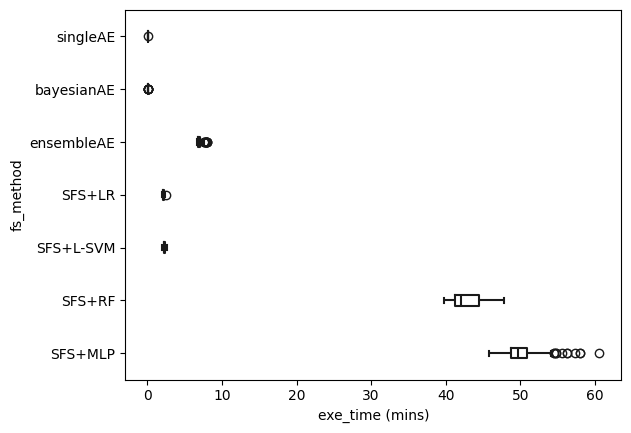

In [380]:
sns.boxplot(data=time_df, x='exe_time (mins)', y='fs_method', width=.2, fill=False, color=".1")

<Axes: xlabel='cumulative_exe_time (mins)', ylabel='fs_method'>

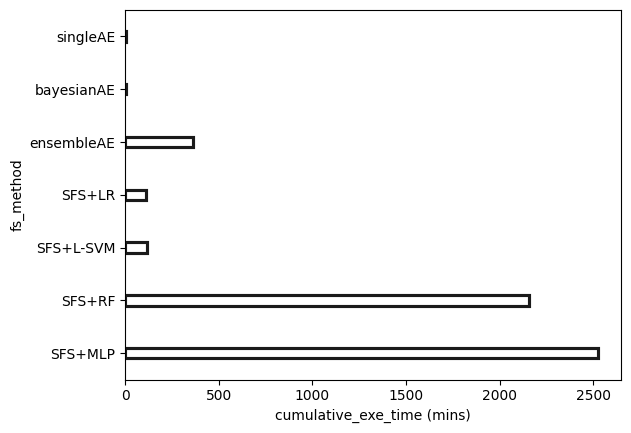

In [383]:
# sns.barplot(data=time_df, x='cumulative_exe_time', y='fs_method', width=.2, fill=False, color=".4")
# sns.boxplot(data=time_df, x='exe_time', y='fs_method', width=.2, fill=False, color=".4")
sns.barplot(data=time_df, x='cumulative_exe_time (mins)', y='fs_method', width=.2, fill=False, color=".1", errorbar=None)

In [ ]:
sns.lineplot(x='# runs', y=)

In [244]:
eAE_results_df.groupby(["outer_seed", "b"]).first().groupby("outer_seed").sum()["exe_time"]

outer_seed
0     453.807192
1     471.945995
2     458.563320
3     452.470424
4     453.171678
         ...    
95    399.452151
96    407.007756
97    403.278791
98    403.950244
99    400.375533
Name: exe_time, Length: 100, dtype: float64

In [199]:
eAE_results_df.groupby(["outer_seed"]).mean()

,exe_time,b,permute_seed,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
outer_seed,,,,,,,,,,,,,,,,,,,,,
0,4.538072,49.5,48.82,0.994551,0.959673,0.536096,1.010016,0.477070,1.223000,0.629598,...,1.740621,1.592844,1.404003,1.288550,0.852831,0.610010,1.022954,1.423275,0.865660,0.5
1,4.719460,49.5,48.87,1.080561,1.037511,0.253512,1.338946,0.399666,1.416496,0.807250,...,1.592933,1.460885,1.164827,1.918225,1.000508,1.690211,1.079333,1.757432,0.748946,0.5
2,4.585633,49.5,49.16,0.941651,0.728161,0.293061,0.877801,0.461279,1.241509,0.577888,...,1.664827,1.495073,0.878551,1.739648,0.503984,1.046811,1.138029,1.616468,0.362165,0.5
3,4.524704,49.5,48.77,1.102872,0.950859,0.638479,0.893894,0.428867,1.583671,0.720248,...,2.024439,1.687747,1.374597,1.879695,1.158109,1.248466,1.215327,1.783591,0.652938,0.5
4,4.531717,49.5,48.87,0.928858,0.938200,0.407897,0.914931,0.316352,1.173957,0.592245,...,1.555551,1.372052,0.891789,1.342688,0.872234,0.966690,0.994251,1.433388,0.138537,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3.994522,49.5,49.16,1.024076,0.912905,0.801200,0.857105,0.401359,1.787616,0.670941,...,1.827096,1.725755,1.302738,1.607100,0.956866,1.034088,1.108859,1.664408,0.633918,0.5
96,4.070078,49.5,48.77,0.985120,0.890528,0.488939,0.995362,0.420511,1.394881,0.642957,...,1.447935,1.280793,1.187205,1.596884,0.594937,1.263703,1.146068,1.381640,0.631004,0.5
97,4.032788,49.5,48.87,0.990106,0.876900,0.486988,1.107260,0.389313,1.359774,0.828266,...,1.586502,1.294571,0.749630,1.303604,1.287289,0.894986,1.153377,1.503701,1.040588,0.5


In [191]:
eAE_results_df.groupby(["outer_seed"]).sum()

,exe_time,b,permute_seed,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
outer_seed,,,,,,,,,,,,,,,,,,,,,
0,19967.516452,217800,214808,4376.025129,4222.561077,2358.822238,4444.068805,2099.106699,5381.198659,2770.232777,...,7658.730424,7008.515079,6177.611009,5669.619999,3752.458168,2684.044600,4500.996062,6262.410178,3808.903619,2200.0
1,20765.623784,217800,215028,4754.469519,4565.049023,1115.452141,5891.362392,1758.531322,6232.581219,3551.898048,...,7008.905927,6427.892272,5125.236764,8440.188043,4402.234055,7436.926718,4749.066644,7732.701460,3295.360207,2200.0
2,20176.786098,217800,216304,4143.262470,3203.910138,1289.469729,3862.322890,2029.626589,5462.641300,2542.708522,...,7325.239660,6578.319748,3865.622887,7654.451330,2217.529298,4605.970297,5007.327346,7112.460087,1593.527509,2200.0
3,19908.698653,217800,214588,4852.637513,4183.779331,2809.308333,3933.133933,1887.014969,6968.153011,3169.089263,...,8907.533500,7426.088494,6048.225826,8270.656977,5095.680718,5493.250196,5347.438495,7847.799792,2872.928362,2200.0
4,19939.553814,217800,215028,4086.973836,4128.080063,1794.748936,4025.697241,1391.950482,5165.412045,2605.876539,...,6844.422355,6037.027576,3923.871548,5907.826070,3837.831799,4253.434623,4374.704439,6306.907525,609.562661,2200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,17575.894647,217800,216304,4505.933371,4016.780960,3525.281197,3771.263694,1765.980776,7865.508906,2952.140639,...,8039.222085,7593.320419,5732.047013,7071.239304,4210.212088,4549.988001,4878.979058,7323.393887,2789.240236,2200.0
96,17908.341243,217800,214588,4334.529725,3918.322311,2151.332877,4379.592867,1850.246687,6137.475917,2829.010664,...,6370.912146,5635.490643,5223.700381,7026.289986,2617.721198,5560.293520,5042.700086,6079.216536,2776.419368,2200.0
97,17744.266812,217800,215028,4356.465504,3858.361202,2142.746621,4871.945196,1712.978420,5983.006839,3644.370804,...,6980.608833,5696.111971,3298.370044,5735.859784,5664.073482,3937.936970,5074.859814,6616.282637,4578.586715,2200.0


In [188]:
eAE_results_df.groupby(["outer_seed","b", "permute_seed"]).sum()

exe_time    re_mean  \
outer_seed b  permute_seed                          
0          0  46            323.141302  47.108094   
           1  73            194.068139  57.904083   
           2  72            192.469809  56.961365   
           3  0             206.789638  40.223079   
           4  36            194.093966  36.548195   
...                                ...        ...   
99         95 6             169.742393  37.936810   
           96 85            172.777449  48.110616   
           97 66            171.394801  35.677452   
           98 42            183.661351  45.943759   
           99 52            172.783648  38.870084   

                            re_sub_wout_original_glcm_ClusterProminence  \
outer_seed b  permute_seed                                                
0          0  46                                              38.313529   
           1  73                                              62.336422   
           2  72                                              55.021804   
           3  0                                               43.822984   
           4  36                                              31.558491   
...                                                                 ...   
99         95 6                                               50.656112   
           96 85                                              54.670143   
           97 66                                              64.410997   
           98 42                                              50.125669   
           99 52                                              77.723410   

                            re_adc_original_firstorder_Minimum  \
outer_seed b  permute_seed                                       
0          0  46                                     30.453868   
           1  73                                     11.736692   
           2  72                                     11.732022   
           3  0                                      19.016584   
           4  36                                     30.469362   
...                                                        ...   
99         95 6                                      18.458764   
           96 85                                      2.689071   
           97 66                                      6.761006   
           98 42                                     31.685030   
           99 52                                     18.458781   

                            re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis  \
outer_seed b  permute_seed                                                        
0          0  46                                                    38.694159     
           1  73                                                    37.424463     
           2  72                                                    41.542158     
           3  0                                                     39.233130     
           4  36                                                    62.930699     
...                                                                       ...     
99         95 6                                                     41.258281     
           96 85                                                    42.915823     
           97 66                                                    35.235961     
           98 42                                                    48.384051     
           99 52                                                    56.635772     

                            re_sub_wout_original_firstorder_Maximum  \
outer_seed b  permute_seed                                            
0          0  46                                          43.452620   
           1  73                                          15.658439   
           2  72                                          15.490774   
           3  0                                           16.160289   

In [183]:
eAE_results_df.groupby(["outer_seed", "permute_seed"]).sum()

exe_time      b     re_mean  \
outer_seed permute_seed                                   
0          0             1390.671268  14784  276.678678   
           6             1408.884583  15400  324.830851   
           16            1203.569573  13068  277.706578   
           27            1183.958032  12804  238.720445   
           36            1434.644381  15092  276.499465   
...                              ...    ...         ...   
99         72            1245.304944  14476  343.857443   
           73            1210.334067  14168  284.671325   
           74            1038.342687  12540  249.781072   
           79            1053.569664  13596  293.261224   
           85            1242.724406  15708  337.102360   

                         re_sub_wout_original_glcm_ClusterProminence  \
outer_seed permute_seed                                                
0          0                                              270.921901   
           6                                              319.994291   
           16                                             177.251818   
           27                                             248.045032   
           36                                             248.148209   
...                                                              ...   
99         72                                             204.014161   
           73                                             296.940820   
           74                                             332.507925   
           79                                             300.250499   
           85                                             381.111367   

                         re_adc_original_firstorder_Minimum  \
outer_seed permute_seed                                       
0          0                                     121.521249   
           6                                      84.413104   
           16                                    182.707347   
           27                                    183.151690   
           36                                    213.371172   
...                                                     ...   
99         72                                     54.001573   
           73                                     49.444172   
           74                                    236.665681   
           79                                     27.651853   
           85                                     19.637325   

                         re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis  \
outer_seed permute_seed                                                        
0          0                                                    282.850213     
           6                                                    272.119980     
           16                                                   434.984327     
           27                                                   261.992647     
           36                                                   493.476686     
...                                                                    ...     
99         72                                                   438.342082     
           73                                                   271.055105     
           74                                                   238.736375     
           79                                                   404.611268     
           85                                                   294.724859     

                         re_sub_wout_original_firstorder_Maximum  \
outer_seed permute_seed                                            
0          0                                          111.066023   
           6                                           54.524581   
           16                                         175.846410   
           27                                         146.979019   
           36                                         

In [181]:
bAE_results_df.groupby("outer_seed").max()

,exe_time,b,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,re_sub_win_original_glcm_Autocorrelation,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
outer_seed,,,,,,,,,,,,,,,,,,,,,
0,8.282650,99,2.656693,9.153393,9.563897,6.468371,8.876532,4.837334,9.175561,3.574359,...,9.071021,9.090593,9.114937,9.030787,9.243217,9.502564,4.072400,9.061679,9.087683,1.0
1,5.591933,99,2.984251,9.070104,3.629178,8.126760,0.828675,5.953736,7.178779,6.074356,...,9.128284,9.135315,9.125731,9.198460,1.343251,9.195460,9.070861,9.104092,9.074039,1.0
2,5.497629,99,2.464646,9.069973,0.119064,4.248842,9.529792,5.272429,9.230977,5.268515,...,9.060155,9.049053,9.550830,9.089313,4.853702,9.324200,6.586989,9.191235,9.129133,1.0
3,5.309574,99,3.279806,9.063572,9.381223,7.781849,9.633571,7.029150,9.118967,4.627289,...,9.149102,9.113459,9.081089,9.157434,9.068096,9.095945,8.321931,9.152330,0.015278,1.0
4,5.285699,99,2.628210,9.056036,9.400249,6.383718,3.717819,6.674558,9.135643,2.842544,...,9.058646,9.092765,9.142168,9.066775,9.284376,9.238051,4.863959,9.110573,0.013609,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.729574,99,2.655746,9.086842,9.663454,5.166499,9.610395,8.937126,9.138759,3.067987,...,9.118399,9.139325,9.131673,9.127765,4.380263,9.092354,8.032748,9.106188,0.013823,1.0
96,5.051455,99,2.597096,9.065948,9.197846,4.928503,8.861285,4.256122,9.105805,2.866324,...,9.063194,9.167351,9.066721,9.154981,3.621434,9.184120,6.510296,8.450205,9.092424,1.0
97,4.786356,99,2.790115,9.064866,8.759948,7.379466,2.641306,6.876079,9.276719,3.105114,...,9.082249,9.091363,9.541452,9.167451,7.941427,9.468602,6.578237,9.121339,9.086618,1.0


In [180]:
sAE_results_df.groupby("outer_seed").max()

,exe_time,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,re_sub_win_original_glcm_Autocorrelation,re_adc_original_glszm_LargeAreaLowGrayLevelEmphasis,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
outer_seed,,,,,,,,,,,,,,,,,,,,,
0,7.447464,2.508664,7.274336,10.646394,6.087497,7.901450,7.312628,9.534717,2.605933,11.014221,...,4.818519,2.322816,8.199099,4.046638,7.660562,3.269323,5.119664,5.581673,9.729631,1.0
1,4.448452,2.973185,8.999514,3.589055,7.997741,0.795524,5.895702,7.006376,6.032269,0.165811,...,9.000249,9.002621,9.022220,9.110049,1.316426,9.104609,8.994599,9.016987,8.999147,1.0
2,4.283619,2.459066,9.000497,0.110962,4.215003,9.481745,5.228680,9.187935,5.168466,9.056911,...,8.999061,9.005597,9.430618,8.998929,4.792160,9.253883,6.558826,9.061697,9.046879,1.0
3,4.221581,3.225641,8.639192,9.577982,7.536132,11.275963,7.069201,10.623471,5.252826,8.976130,...,9.132976,11.874343,14.087670,12.779041,10.697584,9.865894,7.202652,10.523168,0.034490,1.0
4,4.719289,2.713370,8.017124,9.338160,5.614364,4.157434,6.454957,5.257168,10.661019,2.004087,...,13.097861,12.254328,13.030715,16.348778,3.673779,12.993794,6.871974,8.549441,0.100375,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4.486738,2.086000,7.115139,10.666778,4.721996,7.502043,7.248327,5.947975,4.096402,2.375013,...,9.635827,6.852275,12.235688,13.596742,1.052137,12.531443,6.487328,7.948429,0.040366,1.0
96,4.849896,3.516157,9.528396,9.369495,4.273077,7.925176,3.266911,10.122365,5.884550,10.467655,...,8.398104,9.362152,11.787407,9.060314,4.662142,9.135720,4.578812,6.214925,6.792625,1.0
97,4.822754,2.030216,10.638795,9.463943,6.812256,3.782164,5.009594,15.342210,2.148026,0.211783,...,4.157341,2.584805,2.437371,13.338901,5.481933,5.651707,5.179720,11.455067,9.447688,1.0


In [165]:
for fs_method in FS_METHODS:

    results_df = pd.read_csv(os.path.join(DATA_DIR, fs_method, "results_df.csv"))

    display(results_df.head(10))
    

,Unnamed: 0,outer_seed,estimator,exe_time
0,0,0,LogisticRegression,126.688438
1,1,1,LogisticRegression,124.897661
2,2,2,LogisticRegression,126.326060
3,3,3,LogisticRegression,128.246529
4,4,4,LogisticRegression,122.509578
5,5,5,LogisticRegression,125.671793
6,6,6,LogisticRegression,126.888576
7,7,7,LogisticRegression,128.985214
8,8,8,LogisticRegression,132.773605
9,9,9,LogisticRegression,130.140199


,outer_seed,exe_time,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,re_sub_win_original_glcm_Autocorrelation,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
0,0,7.447464,0.929562,0.460933,0.114965,0.000359,0.167534,0.102415,1.848260,0.341341,...,0.251235,0.933471,0.390006,0.188880,0.034992,0.005063,2.503888,0.987238,0.650787,0.0
1,0,7.447464,0.476327,0.004461,0.009834,1.207278,0.034707,0.590576,0.142662,0.027641,...,0.099785,0.060027,0.648809,0.079577,0.016881,0.075052,0.105668,1.693810,0.053445,0.0
2,0,7.447464,0.521845,0.218627,0.028873,0.736350,0.004143,0.742414,0.219901,2.072003,...,0.055313,0.005285,0.008150,0.337783,0.142860,0.002710,0.047136,0.075542,0.092816,0.0
3,0,7.447464,0.529766,0.456933,5.831790,0.127113,0.000070,0.171161,0.000063,1.411922,...,0.010952,0.511873,0.423376,0.026015,0.328065,0.050233,0.613984,0.021614,0.014309,0.0
4,0,7.447464,0.537075,0.275772,0.034578,0.343090,0.006207,0.456422,0.011110,0.019361,...,0.024802,0.393920,0.396355,0.121873,0.100023,0.079639,0.191025,0.467579,0.009283,0.0
5,0,7.447464,1.094395,1.369166,0.069026,0.002414,0.022351,0.339193,0.196556,0.000672,...,0.096214,0.020962,3.008043,0.455229,2.337380,0.000123,0.508284,0.040593,0.003963,0.0
6,0,7.447464,1.698051,3.601497,0.027734,0.178339,0.024105,0.090921,0.003638,0.000010,...,1.089347,1.229645,4.471812,0.159004,0.212349,3.269323,0.343205,0.977079,1.954909,0.0
7,0,7.447464,2.508664,6.947762,0.041641,2.600799,0.060620,0.453777,9.534717,0.908857,...,0.763682,1.524134,0.129064,0.002212,7.660562,0.213678,0.011471,1.135705,2.355147,0.0
8,0,7.447464,0.899088,0.073653,0.107000,0.001490,0.158525,0.768261,0.302886,0.226580,...,0.100629,0.017553,0.935640,0.010632,1.880241,0.000511,0.011576,1.792427,9.729631,0.0
9,0,7.447464,1.271477,0.038742,0.030939,2.415249,0.046436,0.128175,0.001880,0.280301,...,0.009286,0.267651,2.723349,1.856380,0.003863,2.229462,0.102339,4.619665,1.813666,0.0


,outer_seed,exe_time,b,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,re_sub_wout_original_firstorder_Mean,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
0,0,8.28265,0,1.074636,0.766708,0.011399,0.018562,0.030992,0.068984,1.763850,...,0.279376,1.051713,0.895773,0.251844,0.078548,0.054955,1.963659,0.654257,0.835916,0.0
1,0,8.28265,0,0.488777,0.000676,0.011028,1.246552,0.031838,0.389767,0.153662,...,0.551625,0.418879,0.266655,0.007424,0.008495,0.242015,0.015983,2.509813,0.389065,0.0
2,0,8.28265,0,0.436874,0.787958,0.009922,0.542052,0.029877,1.233045,0.279565,...,0.454725,0.804865,0.811920,0.022242,0.045224,0.052751,0.000109,1.216716,0.200381,0.0
3,0,8.28265,0,0.575825,0.125883,4.931565,0.075185,0.029878,0.038150,0.003739,...,0.746369,0.000400,0.018525,0.604992,1.116547,0.238456,0.994862,0.261788,0.567486,0.0
4,0,8.28265,0,0.375749,0.007718,0.011200,0.209158,0.030763,0.872697,0.028027,...,1.211447,0.047315,0.163439,0.162264,0.858427,0.000193,0.457389,0.028752,0.748256,0.0
5,0,8.28265,0,0.746455,0.408758,0.011551,0.043814,0.031095,0.761096,0.135221,...,0.604843,1.241970,0.248706,0.034960,0.655656,0.096763,0.208731,0.648019,0.657964,0.0
6,0,8.28265,0,2.466869,3.241723,0.011380,0.615096,0.030717,0.025515,0.001252,...,8.989565,8.542629,9.031742,4.534773,0.075063,9.339951,3.024314,0.008148,0.257686,0.0
7,0,8.28265,0,2.647989,7.967000,0.008653,2.172972,0.026962,0.442561,9.041473,...,0.000803,0.326751,0.126688,0.425209,9.163764,0.031522,0.052580,2.649798,0.596391,0.0
8,0,8.28265,0,0.776933,0.008124,0.010515,0.015048,0.030709,0.660611,0.266884,...,0.132049,0.002969,0.467673,0.036272,1.664143,0.032784,0.083183,1.388791,9.026389,0.0
9,0,8.28265,0,1.291413,0.134054,0.008605,2.765539,0.029179,0.118862,0.013495,...,0.669947,1.608058,0.844742,4.105500,0.100205,3.338811,0.489242,7.396462,0.272378,0.0


,outer_seed,exe_time,b,permute_seed,re_mean,re_sub_wout_original_glcm_ClusterProminence,re_adc_original_firstorder_Minimum,re_sub_wout_original_glszm_LowGrayLevelZoneEmphasis,re_sub_wout_original_firstorder_Maximum,re_adc_original_glcm_ClusterShade,...,re_t2w_original_glszm_SizeZoneNonUniformityNormalized,re_t2w_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaHighGrayLevelEmphasis,re_sub_win_original_glszm_SizeZoneNonUniformityNormalized,re_sub_wout_original_glszm_SmallAreaHighGrayLevelEmphasis,re_sub_win_original_glcm_MaximumProbability,re_sub_win_original_glcm_Imc1,re_sub_wout_original_glcm_JointEntropy,re_t2w_original_glszm_LargeAreaLowGrayLevelEmphasis,label
0,0,7.344121,0,46,0.637195,0.602339,0.010593,0.209406,0.012037,1.021533,...,0.348185,1.188180,0.000257,0.003602,1.269293,0.094228,0.388325,0.320981,0.423353,0.0
1,0,7.344121,0,46,0.599825,1.419427,0.010545,0.089981,0.011973,0.000098,...,0.035586,0.083219,0.096313,0.014740,0.043183,0.268606,1.597833,0.114360,0.037735,0.0
2,0,7.344121,0,46,0.681380,2.362078,0.010471,0.133551,0.012020,5.341920,...,0.053539,0.000611,0.000778,0.038819,0.079306,0.191368,0.000240,0.219725,0.008589,0.0
3,0,7.344121,0,46,1.475968,0.199232,0.010524,0.073663,9.482891,1.629000,...,0.010790,0.122612,0.344280,0.259430,1.875155,0.597614,2.704916,0.117915,0.205954,0.0
4,0,7.344121,0,46,0.712915,0.257227,0.010518,1.013936,0.012050,0.000661,...,1.325461,0.000018,0.203824,0.122577,0.154634,0.185265,2.318358,0.806607,0.010711,0.0
5,0,7.344121,0,46,0.328220,0.005671,0.010490,0.034036,0.012006,0.282868,...,0.085991,1.302944,0.086062,0.000436,0.245283,0.273934,0.032326,1.903424,0.336207,0.0
6,0,7.344121,0,46,1.947326,1.055403,0.010535,0.006998,0.011962,8.999725,...,1.061197,1.615095,0.124241,0.009061,0.112529,0.012964,1.945636,1.082224,9.203780,0.0
7,0,7.344121,0,46,0.869033,0.025372,0.010526,1.253785,0.012093,6.067316,...,0.319832,0.014574,0.082017,0.106869,0.047392,0.030195,0.087419,0.025383,0.000147,0.0
8,0,7.344121,0,46,1.165299,0.025775,0.010567,2.007427,0.011995,2.827007,...,3.049274,0.926777,0.012036,1.508800,0.002804,0.580801,2.198297,3.209460,9.203654,0.0
9,0,7.344121,0,46,1.345628,0.038292,9.483177,0.286860,9.481223,2.515385,...,0.003244,0.026829,0.025717,0.068250,0.712321,0.015402,0.254463,0.698398,0.077363,0.0
